In [145]:
# !pip install pandas matplotlib

In [146]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 5]

In [147]:
columns = ["mazeNumber", "time", "expansions", "aStarCalls"]

In [148]:
adDF = pd.read_csv('adaptive.csv', header=None)
forwardDF = pd.read_csv('forward.csv', header=None)
backwardDF = pd.read_csv('backward.csv', header=None)
revGDF = pd.read_csv('rev_g.csv', header=None)
forwardDF.columns = columns
backwardDF.columns = columns
revGDF.columns = columns
adDF.columns = columns
df_list = [forwardDF, adDF, backwardDF, revGDF]


In [149]:
mazes = []
for df in df_list:
    mazes.append(set(forwardDF['mazeNumber'].tolist()))

In [150]:
good_maze_numbers = list(set(set(list(set(forwardDF.mazeNumber.tolist()).intersection(set(revGDF.mazeNumber.tolist())))).intersection(set(backwardDF.mazeNumber.tolist()))).intersection(set(adDF.mazeNumber.tolist())))

In [151]:
forwardDF = forwardDF[forwardDF.mazeNumber.isin(good_maze_numbers)].iloc[:50]
backwardDF = backwardDF[backwardDF.mazeNumber.isin(good_maze_numbers)].iloc[:50]
revGDF = revGDF[revGDF.mazeNumber.isin(good_maze_numbers)].iloc[:50]
adDF = adDF[adDF.mazeNumber.isin(good_maze_numbers)].iloc[:50]

In [152]:
print("Forward A*: \nMean Time = ", forwardDF.time.mean(),  "\nMean Expansions: ",forwardDF.expansions.mean(),  "\nMean A* calls: ", forwardDF.aStarCalls.mean())
print("Backward A*: \nMean Time = ", backwardDF.time.mean(),  "\nMean Expansions: ",backwardDF.expansions.mean(),  "\nMean A* calls: ", backwardDF.aStarCalls.mean())
print("Reversed G*: \nMean Time = ", revGDF.time.mean(),  "\nMean Expansions: ",revGDF.expansions.mean(),  "\nMean A* calls: ", revGDF.aStarCalls.mean())
print("Adaptive A*: \nMean Time = ", adDF.time.mean(),  "\nMean Expansions: ",adDF.expansions.mean(),  "\nMean A* calls: ", adDF.aStarCalls.mean())

Forward A*: 
Mean Time =  0.09349687576293941 
Mean Expansions:  1191.64 
Mean A* calls:  103.28
Backward A*: 
Mean Time =  0.9876885414123535 
Mean Expansions:  1697.14 
Mean A* calls:  110.66
Reversed G*: 
Mean Time =  0.6435128927230835 
Mean Expansions:  1977.04 
Mean A* calls:  98.52
Adaptive A*: 
Mean Time =  0.23000173575744629 
Mean Expansions:  2518.88 
Mean A* calls:  116.04


Text(0, 0.5, 'Time (s)')

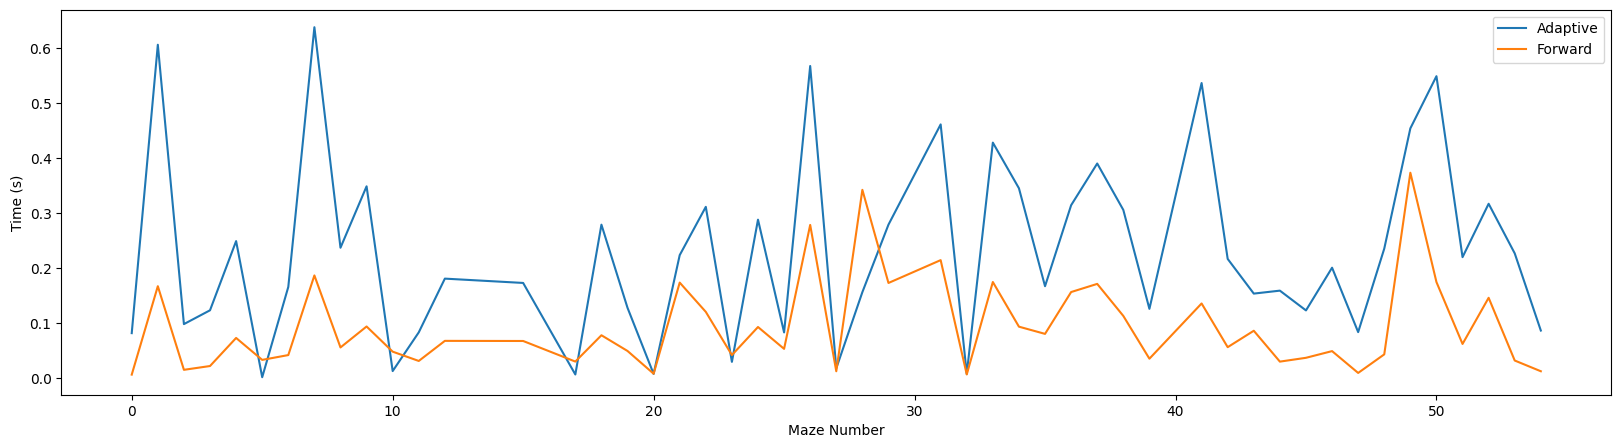

In [153]:
plt.plot(adDF["mazeNumber"], adDF["time"], label="Adaptive")
plt.plot(forwardDF["mazeNumber"], forwardDF["time"], label="Forward")
# plt.plot(backwardDF["mazeNumber"], backwardDF["time"], label="Backward")
# plt.plot(revGDF["mazeNumber"], revGDF["time"], label="Rev G")
plt.legend()
plt.xlabel("Maze Number")
plt.ylabel("Time (s)")

Text(0, 0.5, 'Expansions')

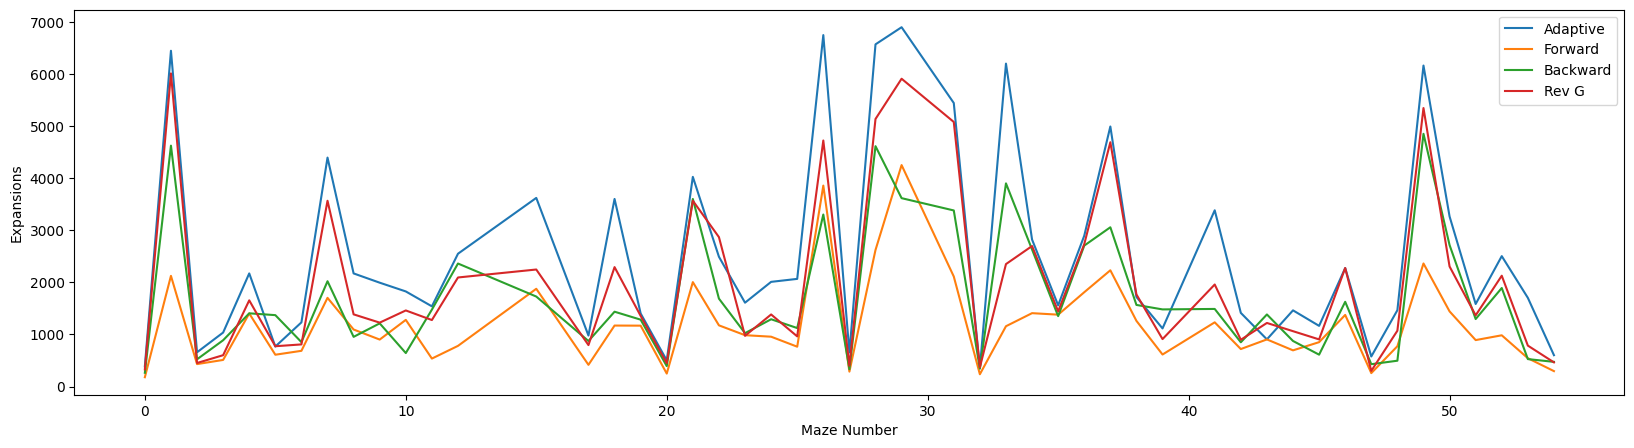

In [154]:
plt.plot(adDF["mazeNumber"], adDF["expansions"], label="Adaptive")
plt.plot(forwardDF["mazeNumber"], forwardDF["expansions"], label="Forward")
plt.plot(backwardDF["mazeNumber"], backwardDF["expansions"], label="Backward")
plt.plot(revGDF["mazeNumber"], revGDF["expansions"], label="Rev G")
plt.legend()
plt.xlabel("Maze Number")
plt.ylabel("Expansions")

Text(0, 0.5, 'A* Calls')

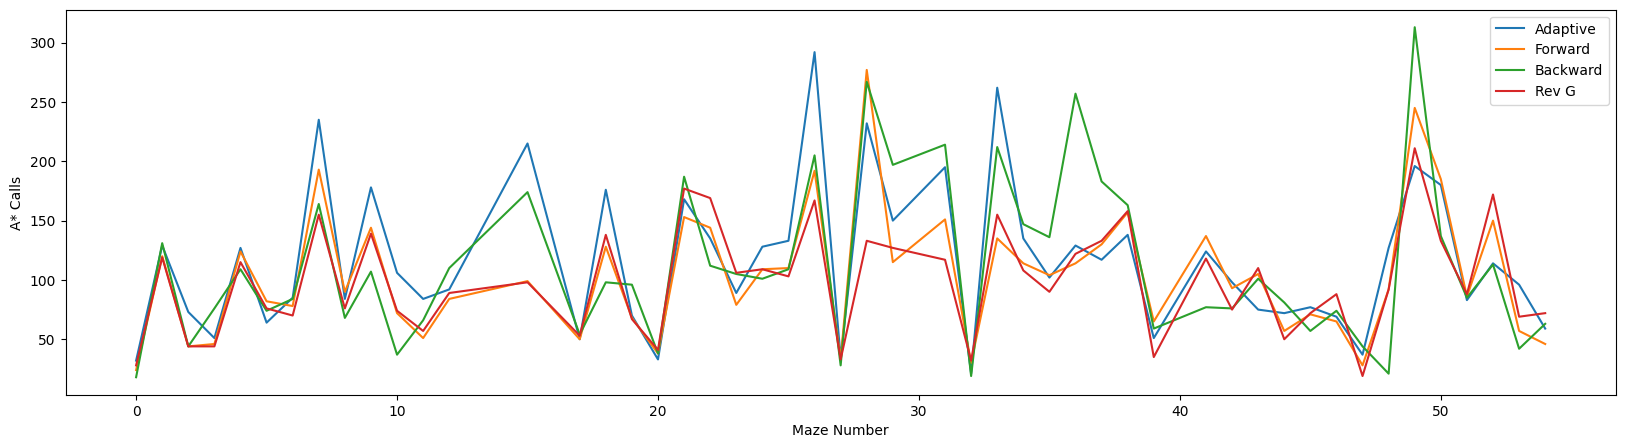

In [155]:
plt.plot(adDF["mazeNumber"], adDF["aStarCalls"], label="Adaptive")
plt.plot(forwardDF["mazeNumber"], forwardDF["aStarCalls"], label="Forward")
plt.plot(backwardDF["mazeNumber"], backwardDF["aStarCalls"], label="Backward")
plt.plot(revGDF["mazeNumber"], revGDF["aStarCalls"], label="Rev G")
plt.legend()
plt.xlabel("Maze Number")
plt.ylabel("A* Calls")